In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening//crx.data",na_values='?',header=None)

In [75]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       678 non-null    object 
 1   1       678 non-null    float64
 2   2       690 non-null    float64
 3   3       684 non-null    object 
 4   4       684 non-null    object 
 5   5       681 non-null    object 
 6   6       681 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      677 non-null    float64
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [77]:
df.describe()

,1,2,7,10,13,14
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


#EDA

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '7'}>, <Axes: title={'center': '10'}>],
       [<Axes: title={'center': '13'}>, <Axes: title={'center': '14'}>]],
      dtype=object)

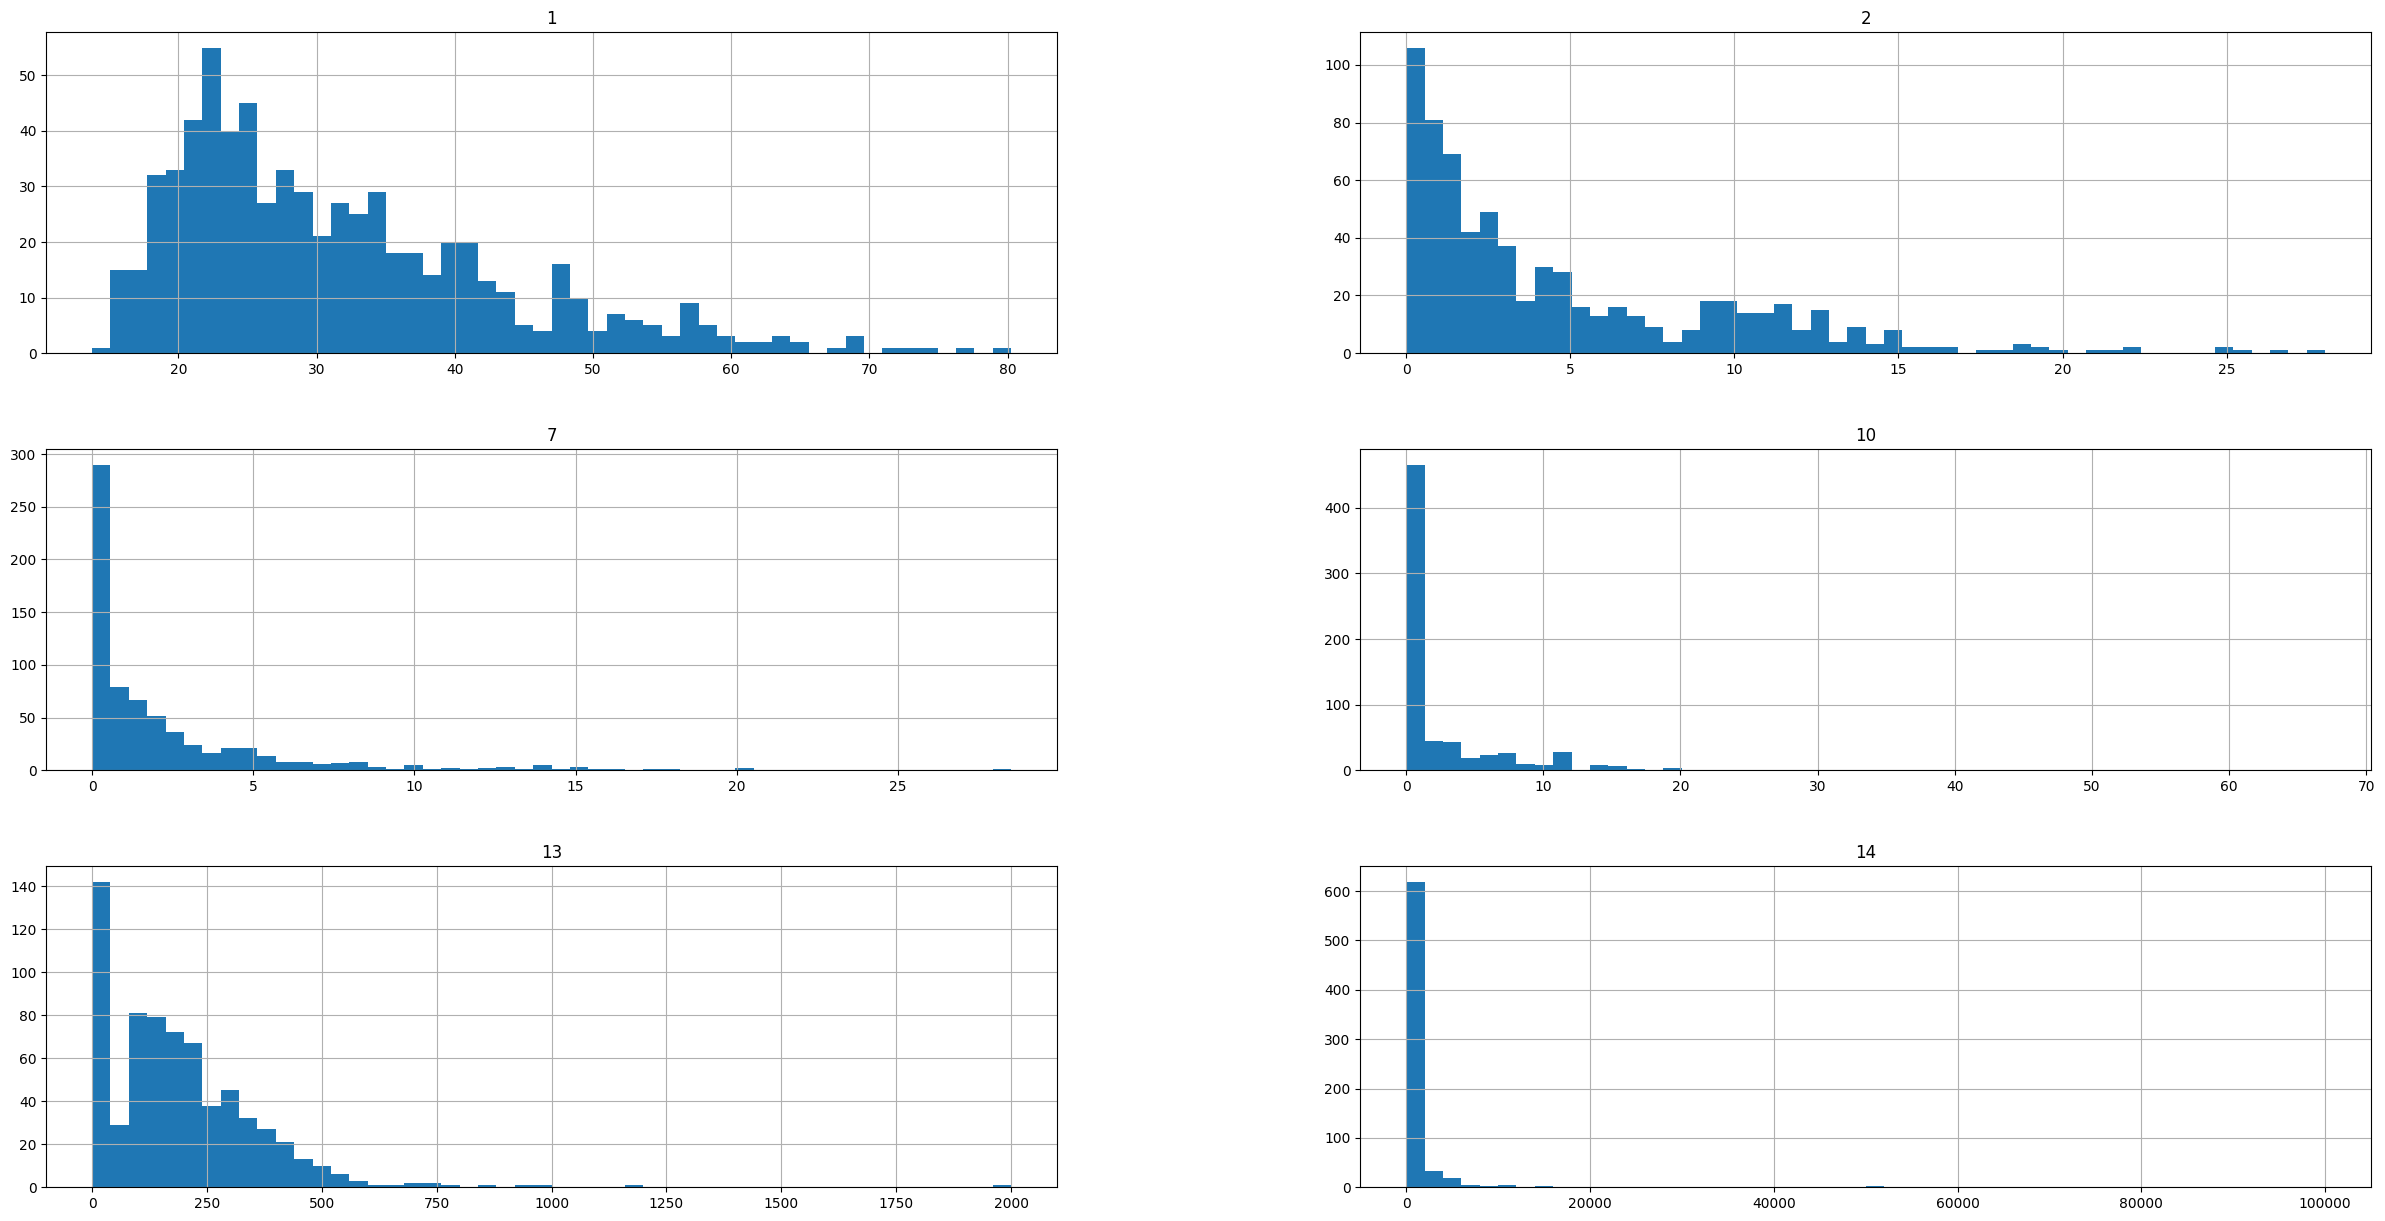

In [78]:
df[df.columns].hist(bins=50,figsize=(30,15))

<ipython-input-79-e553a901c8cf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=False, cmap=cmap,vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})


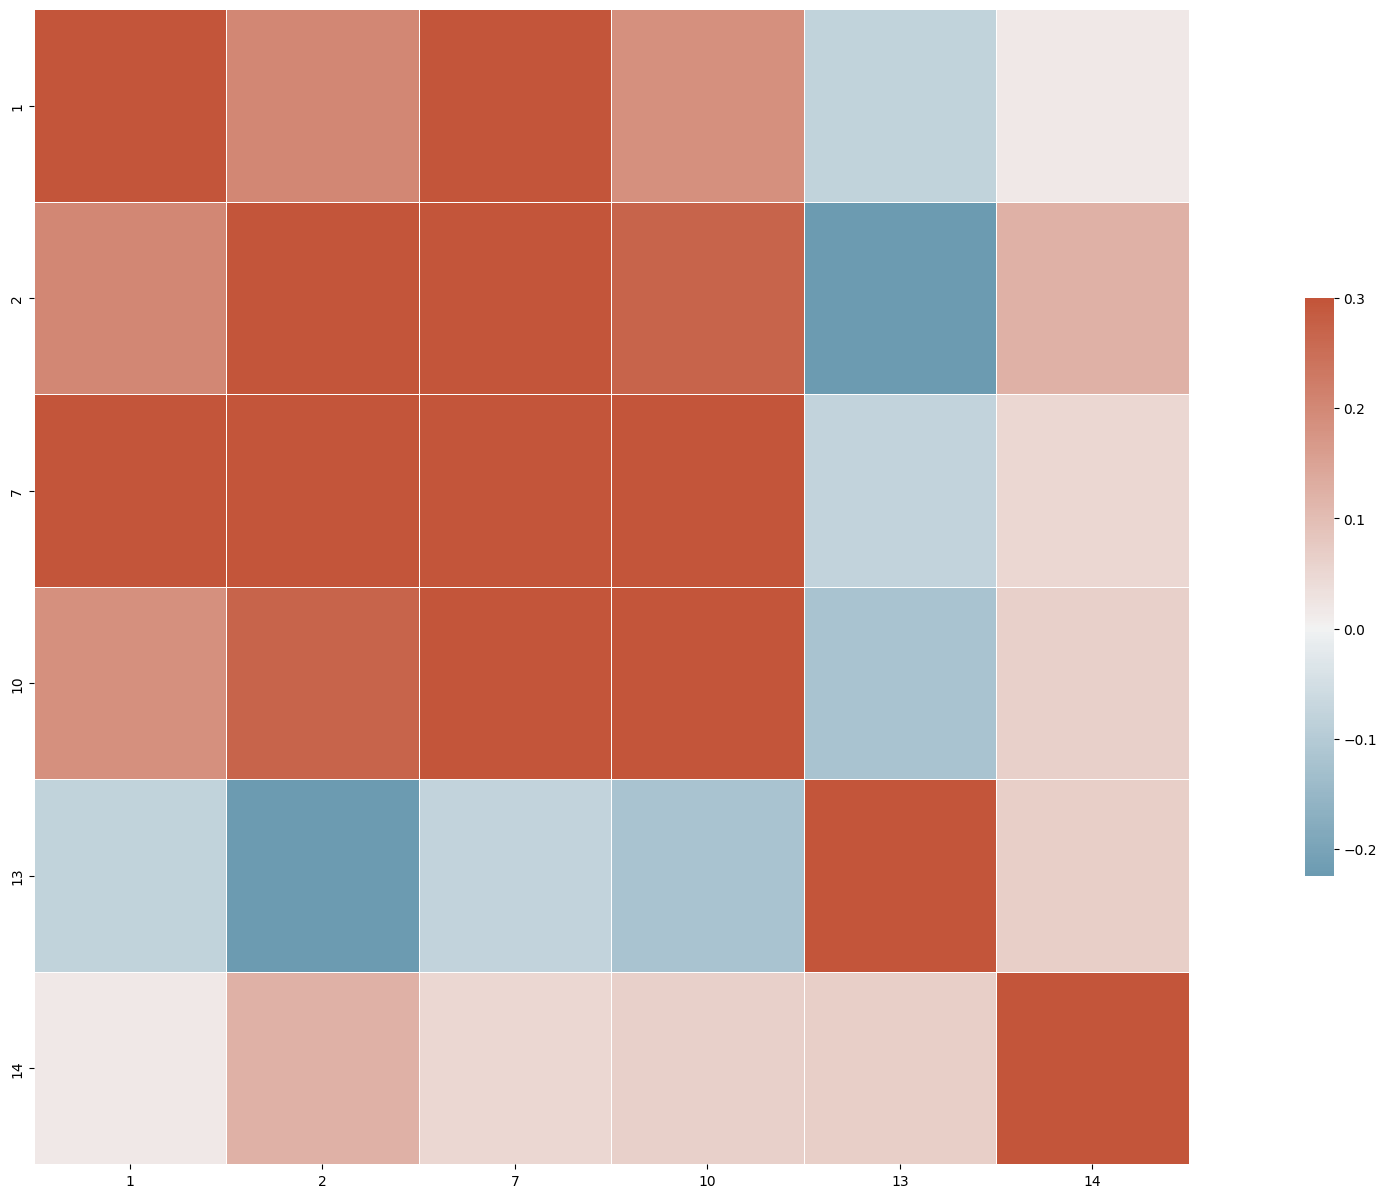

In [79]:
f = plt.figure(figsize=(30, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=False, cmap=cmap,vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig("Cor")

<Axes: xlabel='1', ylabel='Count'>

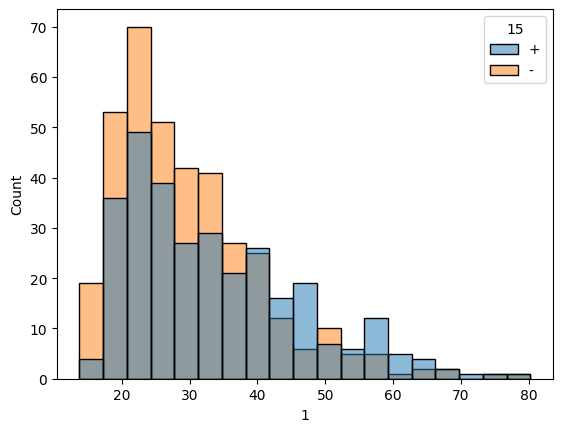

In [82]:
sns.histplot(x=1,data=df,hue=15)

In [83]:
from sklearn.model_selection import train_test_split

In [140]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.3)

#Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
logmodel=LogisticRegression(max_iter=10000)

In [143]:
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [144]:
predictions=logmodel.predict(x_test)

In [145]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

In [146]:
print("Accuracy",accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy 0.8599033816425121


              precision    recall  f1-score   support

           0       0.85      0.84      0.85        95
           1       0.87      0.88      0.87       112

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207



[[80 15]
 [14 98]]


**Logistic Regression performs very well on this case Study**

#K-Nearst Neighbor

In [147]:
from sklearn.neighbors import KNeighborsClassifier

In [148]:
knn=KNeighborsClassifier(n_neighbors=1)

In [149]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [150]:
predictions=knn.predict(x_test)

In [151]:
print("Accuracy",accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy 0.6328502415458938


              precision    recall  f1-score   support

           0       0.60      0.58      0.59        95
           1       0.66      0.68      0.67       112

    accuracy                           0.63       207
   macro avg       0.63      0.63      0.63       207
weighted avg       0.63      0.63      0.63       207



[[55 40]
 [36 76]]


In [152]:
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  error_rate.append(np.mean(pred_i!=y_test))

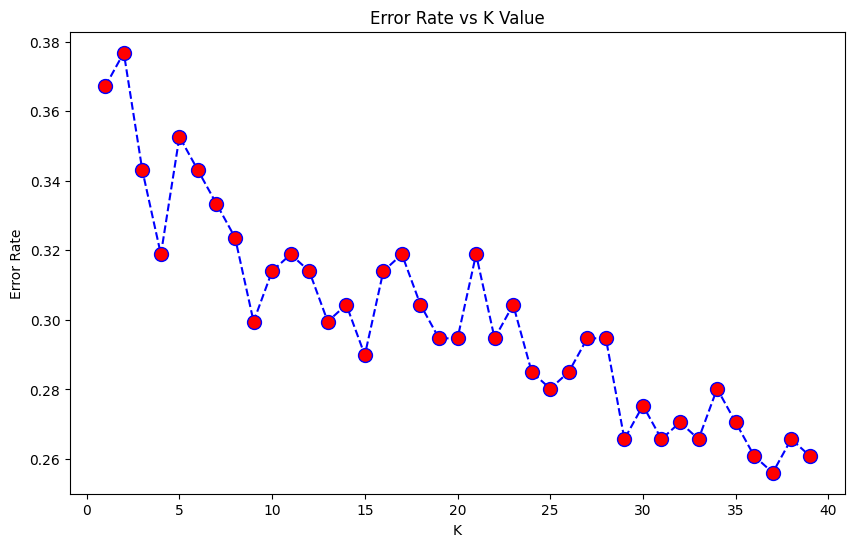

In [153]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig("Error Rate vs K Value")

In [154]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
predictions=knn.predict(x_test)

In [155]:
print("Accuracy",accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy 0.6811594202898551


              precision    recall  f1-score   support

           0       0.70      0.53      0.60        95
           1       0.67      0.81      0.73       112

    accuracy                           0.68       207
   macro avg       0.69      0.67      0.67       207
weighted avg       0.69      0.68      0.67       207



[[50 45]
 [21 91]]


**K-Nearst Neighbor does not perform well on this case Study**

#Decision Tree

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
dtree=DecisionTreeClassifier()

In [158]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [159]:
predictions=dtree.predict(x_test)

In [160]:
print("Accuracy",accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy 0.8260869565217391


              precision    recall  f1-score   support

           0       0.82      0.79      0.81        95
           1       0.83      0.86      0.84       112

    accuracy                           0.83       207
   macro avg       0.83      0.82      0.82       207
weighted avg       0.83      0.83      0.83       207



[[75 20]
 [16 96]]


**Decision Tree does not perform well on this case study**

#Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
rfc = RandomForestClassifier(n_estimators=200)

In [163]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [164]:
predictions = rfc.predict(x_test)

In [165]:
print("Accuracy",accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy 0.8792270531400966


              precision    recall  f1-score   support

           0       0.90      0.83      0.86        95
           1       0.87      0.92      0.89       112

    accuracy                           0.88       207
   macro avg       0.88      0.88      0.88       207
weighted avg       0.88      0.88      0.88       207



[[ 79  16]
 [  9 103]]


**Random Forest Performs the best on this case Study**

#Support Vector Machine

In [166]:
from sklearn.svm import SVC

In [167]:
model = SVC()

In [168]:
model.fit(x_train,y_train)

SVC()

In [169]:
predictions = model.predict(x_test)

In [170]:
print("Accuracy",accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy 0.6521739130434783


              precision    recall  f1-score   support

           0       0.90      0.27      0.42        95
           1       0.61      0.97      0.75       112

    accuracy                           0.65       207
   macro avg       0.75      0.62      0.59       207
weighted avg       0.74      0.65      0.60       207



[[ 26  69]
 [  3 109]]


**Support Vector Machine cannot performs on this case Study**

#Grid Search CV

In [171]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [172]:
from sklearn.model_selection import GridSearchCV

In [173]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [174]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.567 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.557 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.557 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.562 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.562 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.567 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.557 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.557 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.562 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.562 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.567 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [175]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

In [176]:
predictions=grid.predict(x_test)

In [177]:
print("Accuracy",accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy 0.7294685990338164


              precision    recall  f1-score   support

           0       0.72      0.67      0.70        95
           1       0.74      0.78      0.76       112

    accuracy                           0.73       207
   macro avg       0.73      0.73      0.73       207
weighted avg       0.73      0.73      0.73       207



[[64 31]
 [25 87]]


**Grid Search CV perform very well on this case Study**

#Pipeline

In [178]:
pipe1.fit(x_train,y_train)

Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA()), ('svm1', SVC())])

In [179]:
train_pred=pipe1.predict(x_train)
test_pred=pipe1.predict(x_test)

In [180]:
print("Training accuracy:",accuracy_score(train_pred,y_train))
print("Testing accuracy:",accuracy_score(test_pred,y_test))
print("accuracy:",pipe1.score(x_train,y_train))
print("accuracy:",pipe1.score(x_test,y_test))

Training accuracy: 0.8944099378881988
Testing accuracy: 0.8647342995169082
accuracy: 0.8944099378881988
accuracy: 0.8647342995169082


In [182]:
from sklearn.model_selection import cross_validate

In [183]:
cv_results=cross_validate(pipe1,data,target,cv=10)
print(np.average(cv_results['test_score']))

0.8391304347826086


In [184]:
for i in range(5,11):
  cv_results=cross_validate(pipe1,data,target,cv=10)
  print("K Fold: ",i)
  print(np.average(cv_results['test_score']))

K Fold:  5
0.8391304347826086
K Fold:  6
0.8391304347826086
K Fold:  7
0.8391304347826086
K Fold:  8
0.8391304347826086
K Fold:  9
0.8391304347826086
K Fold:  10
0.8391304347826086


In [185]:
for i in range(3,11):
  cv_results=cross_validate(pipe1,data,target,cv=10)
  print("K Fold: ",i)
  print(np.average(cv_results['test_score']))

K Fold:  3
0.8391304347826086
K Fold:  4
0.8391304347826086
K Fold:  5
0.8391304347826086
K Fold:  6
0.8391304347826086
K Fold:  7
0.8391304347826086
K Fold:  8
0.8391304347826086
K Fold:  9
0.8391304347826086
K Fold:  10
0.8391304347826086


In [186]:
training=[]
testing=[]
for i in range (1,15):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  train_pred=knn.predict(x_train)
  test_pred=knn.predict(x_test)
  training.append(accuracy_score(train_pred,y_train))
  testing.append(accuracy_score(test_pred,y_test))


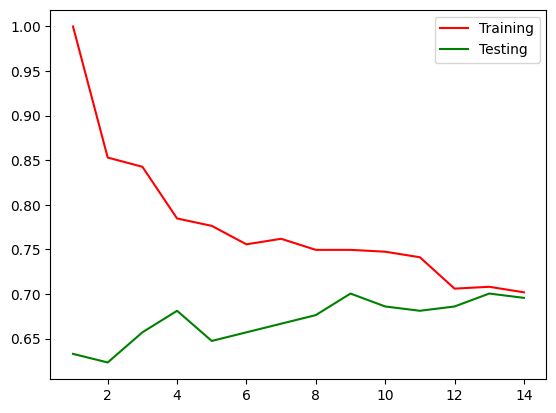

In [187]:

k=range(1,15)
plt.plot(k,training,c='red',label='Training')
plt.plot(k,testing,c='green',label='Testing')
plt.legend()
plt.show()